#  PGWAVE analysis
This reads a PGWAVE-generated list of monthly seeds, as generated by Betta after 31 Aug 2015, makes plots


In [60]:
%matplotlib inline
month=16 # first month is 1
path=os.path.expandvars('$FERMI/skymodels/P301_monthly/month%02d'%month)
os.chdir(path)
pgw_filename='/nfs/farm/g/glast/g/catalog/transients/TBIN_%d_all_pgw.txt'% (month-1)
assert os.path.exists(pgw_filename), 'File %s not found'% pgw_filensme

In [85]:
from uw.like2.analyze import pgwave; reload(pgwave)
self = pgwave.PGwave()

64 37


Saving fig skyplot, ... to plots/pgwave/skyplot_month16.jpg
Saving fig skyplot_good, ... to plots/pgwave/skyplot_good_month16.jpg
Saving fig pg_cumulative_ts, ... to plots/pgwave/pg_cumulative_ts_month16.jpg
**** failed to write footer: 'NoneType' object has no attribute 'group'
saved local menu to plots/pgwave/menu.html
saved html doc to plots/pgwave/index.html
wrote menu /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_monthly/month16/plots/index.html


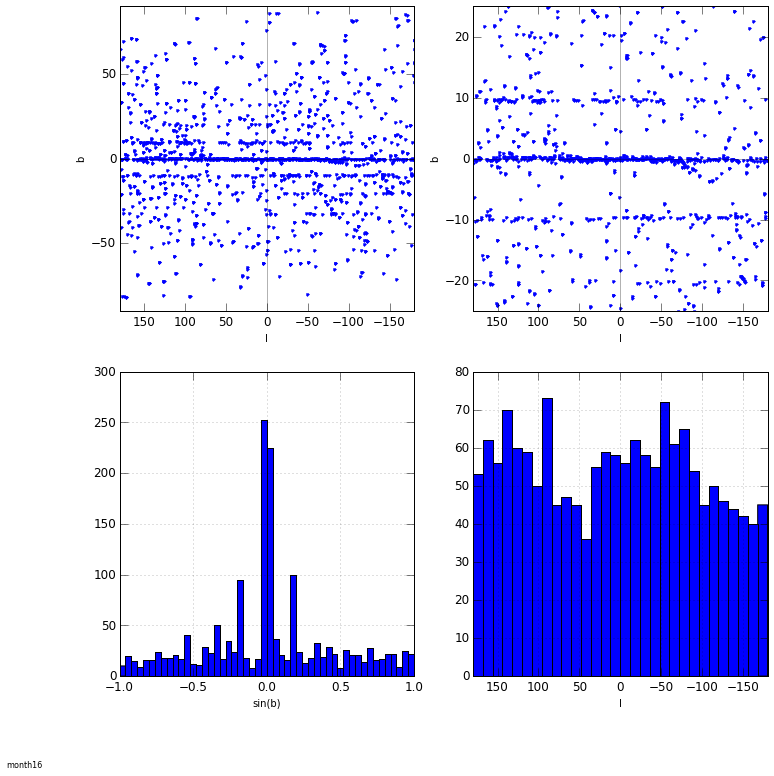

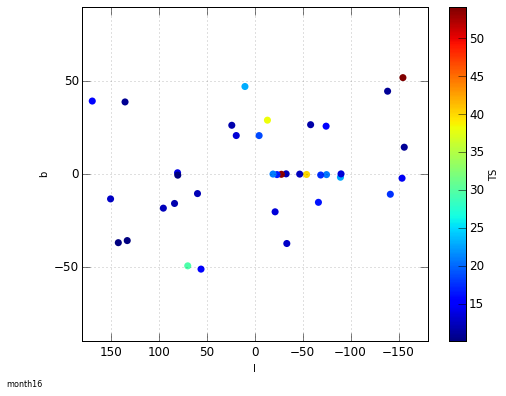

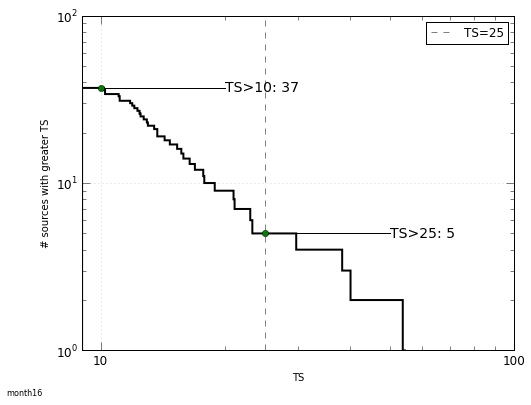

In [86]:
self.all_plots();

In [81]:
self.cumulative_ts()

NameError: global name 'cumulative_ts' is not defined

Save in my seed format?

In [ ]:
reload(pgwave)
self.skyplot_good()

[1, 100, 9, 100]

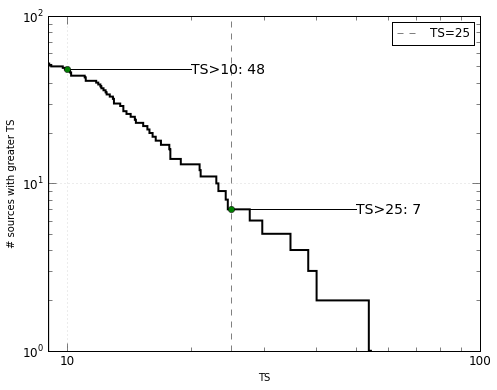

In [68]:
fig=self.cumulative_ts(self.udf.ts, check_localized=False);
plt.setp(fig.get_axes()[0], xlim=(9,100), ylim=(1,100))

In [21]:
import pickle
sdf = pickle.load(open('sources.pickle'))
used = [n.startswith('PGW_%02d'%month) for n in sdf.index]
sum(used)
udf = sdf[used]
good = (udf.ts>10) & (udf.a<0.25) & (udf.locqual<8)
print sum(used),sum(good)

In [84]:
udf.ix[~good]['ts ra dec a locqual'.split()]

,ts,ra,dec,a,locqual
name,,,,,
PGW_16_157_07,10.19666,21.937154,26.388556,0.2625485,3.05
PGW_16_061_05,7.922216,33.278355,73.774200,0.2668026,4.79
PGW_16_144_02,9.721071,57.816152,14.096795,0.2614458,2.63
PGW_16_111_13,9.034276,65.254069,50.078624,0.1709611,4.47
PGW_16_112_05,24.10921,83.821269,23.169281,0.9125643,42.23
PGW_16_095_05,5.600877,84.104695,31.520402,0.2530418,5.36
PGW_16_047_03,8.637848,104.909058,49.765379,0.2009225,1.61
PGW_16_148_09,6.471513,109.897268,-68.905400,0.3409276,5.27
PGW_16_131_06,10.10481,113.406518,-39.348421,0.6419506,13.16
